In [2]:
import numpy as np
import matplotlib.pyplot as plt

from Experiment.compression import calculateCompRatio, compress_dataset
from utils.personal_utils import load_dataset, compute_avg_rmse_of_dataset

import os
import pywt
import matplotlib.pyplot as plt

import time


In [3]:
all_datasets_dic = {
    'AppliancesEnergy':   '/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TEST.ts',
    'NewsTitleSentiment': '/home/sim/Desktop/TS Extrinsic Regression/data/NewsTitleSentiment_TEST.ts',
    'BenzeneConcentration':'/home/sim/Desktop/TS Extrinsic Regression/data/BenzeneConcentration_TEST.ts',
    'BeijingPM25Quality': '/home/sim/Desktop/TS Extrinsic Regression/data/BeijingPM25Quality_TEST.ts',

    'IEEEPPG':            '/home/sim/Desktop/TS Extrinsic Regression/data/IEEEPPG_TEST.ts',
    'FloodModeling1':     '/home/sim/Desktop/TS Extrinsic Regression/data/FloodModeling1_TEST.ts',
    'HouseholdPowerConsumption1': '/home/sim/Desktop/TS Extrinsic Regression/data/HouseholdPowerConsumption1_TEST.ts',
    'Covid3Month':              "/home/sim/Desktop/TS Extrinsic Regression/data/Covid3Month_TEST.ts"

}

all_datasets = [
    '/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/NewsTitleSentiment_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/BenzeneConcentration_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/BeijingPM25Quality_TEST.ts',
    
    '/home/sim/Desktop/TS Extrinsic Regression/data/IEEEPPG_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/FloodModeling1_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/HouseholdPowerConsumption1_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/Covid3Month_TEST.ts'
]


#all_datasets = ['/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TEST.ts']



dataset_params = {
    'AppliancesEnergy':          {'block_size': 1008, 'num_dim': 24, 'len_ts': 144},
    'BeijingPM25Quality':        {'block_size': 1008, 'num_dim': 9, 'len_ts': 24},
    'IEEEPPG':                   {'block_size': 1000, 'num_dim': 5, 'len_ts': 1000},
    'FloodModeling1':           {'block_size': 1064, 'num_dim': 1, 'len_ts': 266},



    'Covid3Month':               {'block_size': 1008, 'num_dim': 1, 'len_ts': 84}, 
    'BenzeneConcentration':      {'block_size': 960, 'num_dim': 8, 'len_ts': 240},
    'NewsTitleSentiment':        {'block_size': 1008, 'num_dim': 3, 'len_ts': 144},
    'HouseholdPowerConsumption1':{'block_size': 1440, 'num_dim': 5, 'len_ts': 1440},

    'HouseholdPowerConsumption2':{'block_size': 1440, 'num_dim': 5, 'len_ts': 1440},
    'FloodModeling2':            {'block_size': 1064, 'num_dim': 1, 'len_ts': 266},
    'BeijingPM10Quality':        {'block_size': 1008, 'num_dim': 9, 'len_ts': 24},
    
}

ds_names = [
    'AppliancesEnergy',
    'FloodModeling1',
    'BenzeneConcentration',
    'BeijingPM25Quality',
    'IEEEPPG',
    'HouseholdPowerConsumption1',
    #'NewsTitleSentiment',
    'Covid3Month',

    #'HouseholdPowerConsumption2',
    #'FloodModeling2',
    'BeijingPM10Quality',
]



In [10]:
def change_ds_name(ds_name):
    # Define the mapping of old names to new names
    name_mapping = {
        'AppliancesEnergy': 'AppliancesEnergy',
        'FloodModeling1': 'Flood',
        'BenzeneConcentration': 'BenzeneConcentration',
        'BeijingPM25Quality': 'ParticulateMatter2.5',
        'IEEEPPG': 'IEEEPPG',
        'HouseholdPowerConsumption1': 'PowerUsage',
        'Covid3Month': 'Covid',
        'BeijingPM10Quality': 'ParticulateMatter10',
    }

    # Apply the mapping to rename the datasets
    return name_mapping[ds_name]


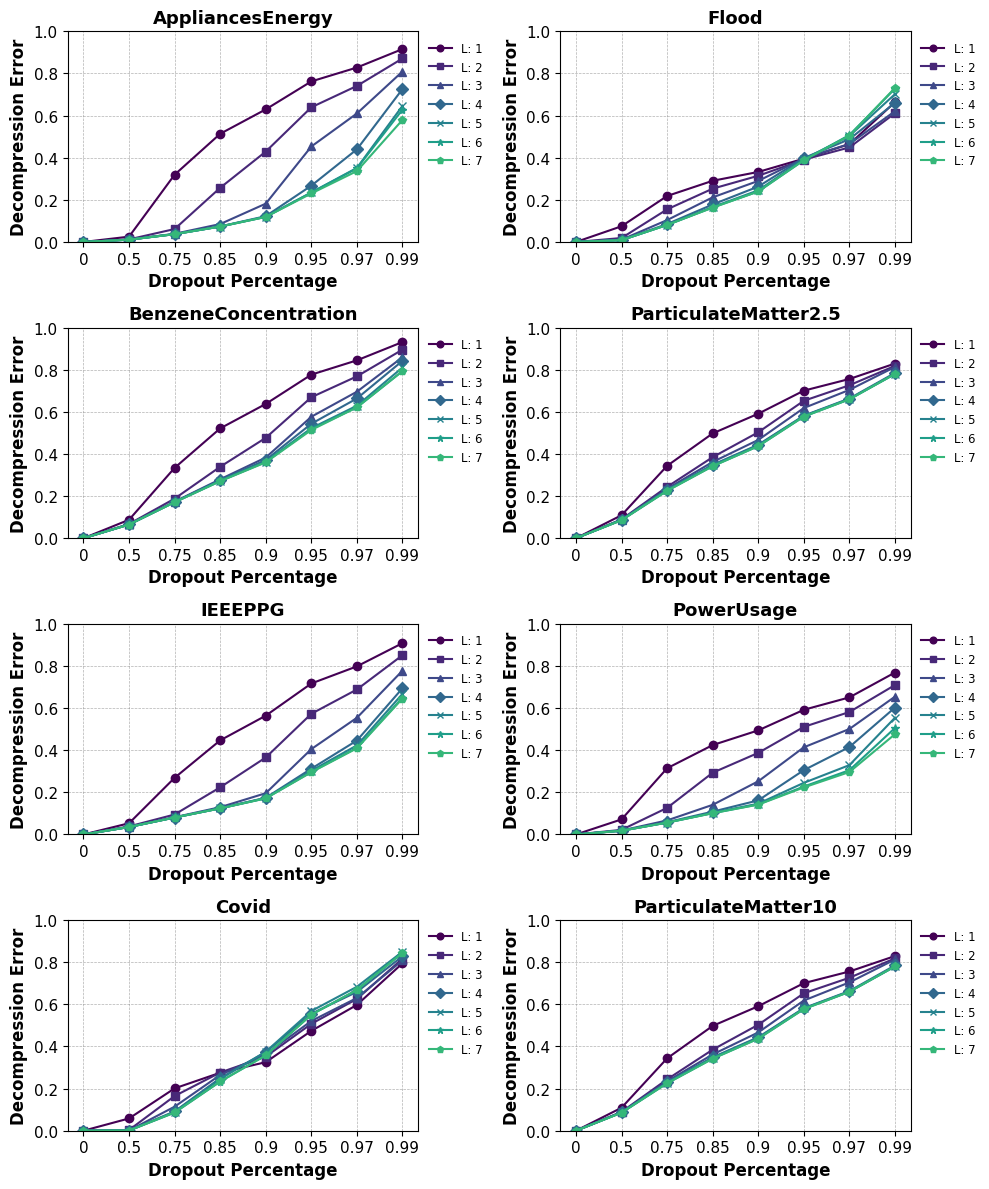

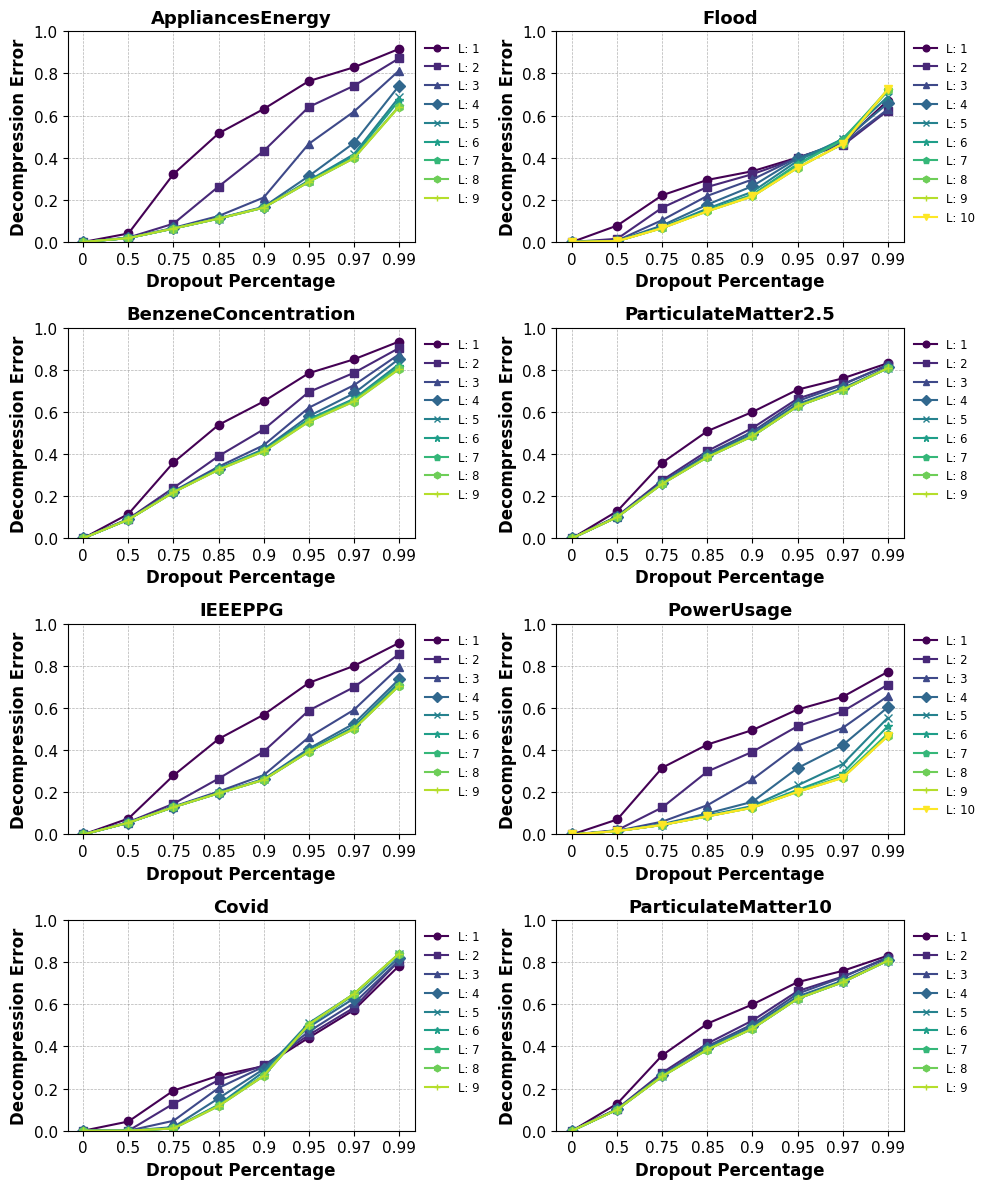

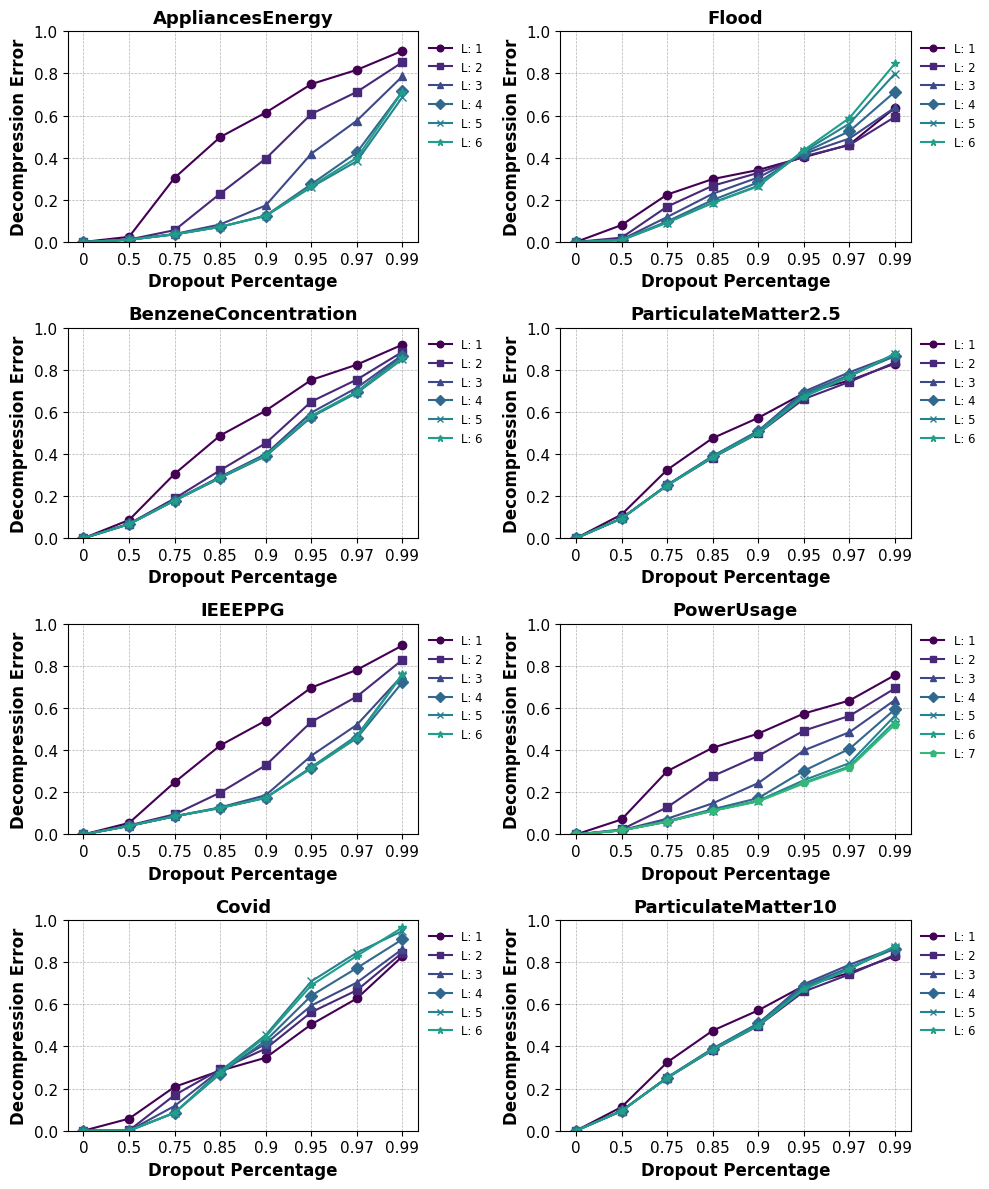

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pywt
import os

wavelets = ['db4', 'haar', 'bior3.5']
splits = ['TEST']

for split in splits:

    markers = ['o', 's', '^', 'D', 'x', '*', 'p', 'h', '+', 'v']
    colors = plt.cm.viridis(np.linspace(0, 1, 10))  # Custom color map

    dropout_values = [0, 0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]
    custom_x_ticks = np.arange(len(dropout_values))

    for wavelet in wavelets:
        plt.figure(figsize=(10, 12))  

        for subplot_id, ds_name in enumerate(ds_names):
            plt.subplot(4, 2, subplot_id + 1)

            max_level = pywt.dwt_max_level(dataset_params[ds_name]['block_size'], wavelet)

            for level in range(1, max_level + 1):
                rmses = np.load(f'/home/sim/Desktop/TS Extrinsic Regression/data/Wavelet-Levels/wv-lvl:{level}-{ds_name}_{wavelet}_{split}.npy')
                
                marker_style = markers[level - 1]
                color_style = colors[level - 1]

                plt.plot(custom_x_ticks, rmses, markersize=6, marker=marker_style, color=color_style,
                         linewidth=1.5, label=f"L: {level}")

            ds_name = change_ds_name(ds_name)

            plt.gca().set_ylim((0, 1.0))
            plt.gca().set_yticks(np.arange(0, 1.1, 0.2))

            plt.xticks(fontsize=11)
            plt.yticks(fontsize=11)

            plt.xlabel("Dropout Percentage", fontsize=12, fontweight='bold')
            plt.ylabel("Decompression Error", fontsize=12, fontweight='bold')
            plt.title(f"{ds_name}", fontsize=13, fontweight='bold')

            plt.xticks(custom_x_ticks, dropout_values)
            plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
            plt.legend(fontsize="small", loc='upper left', bbox_to_anchor=(1, 1), markerscale=0.8, frameon=False)

        plt.tight_layout()

        save_dir = "../plots/Wavelets"
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(f'{save_dir}/lvl-{wavelet}_{split}_plot.pdf', format='pdf')
        plt.show()
        plt.close()

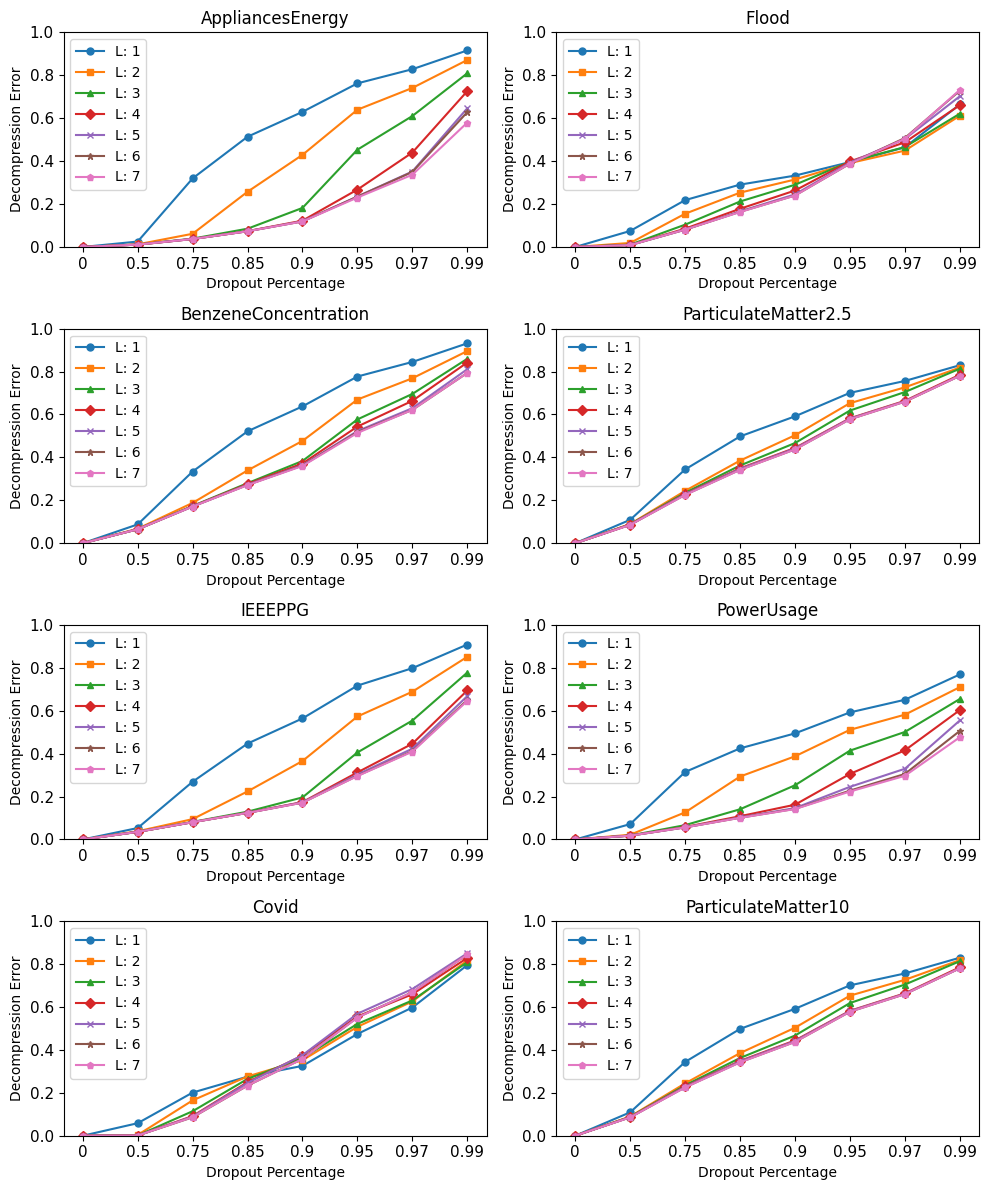

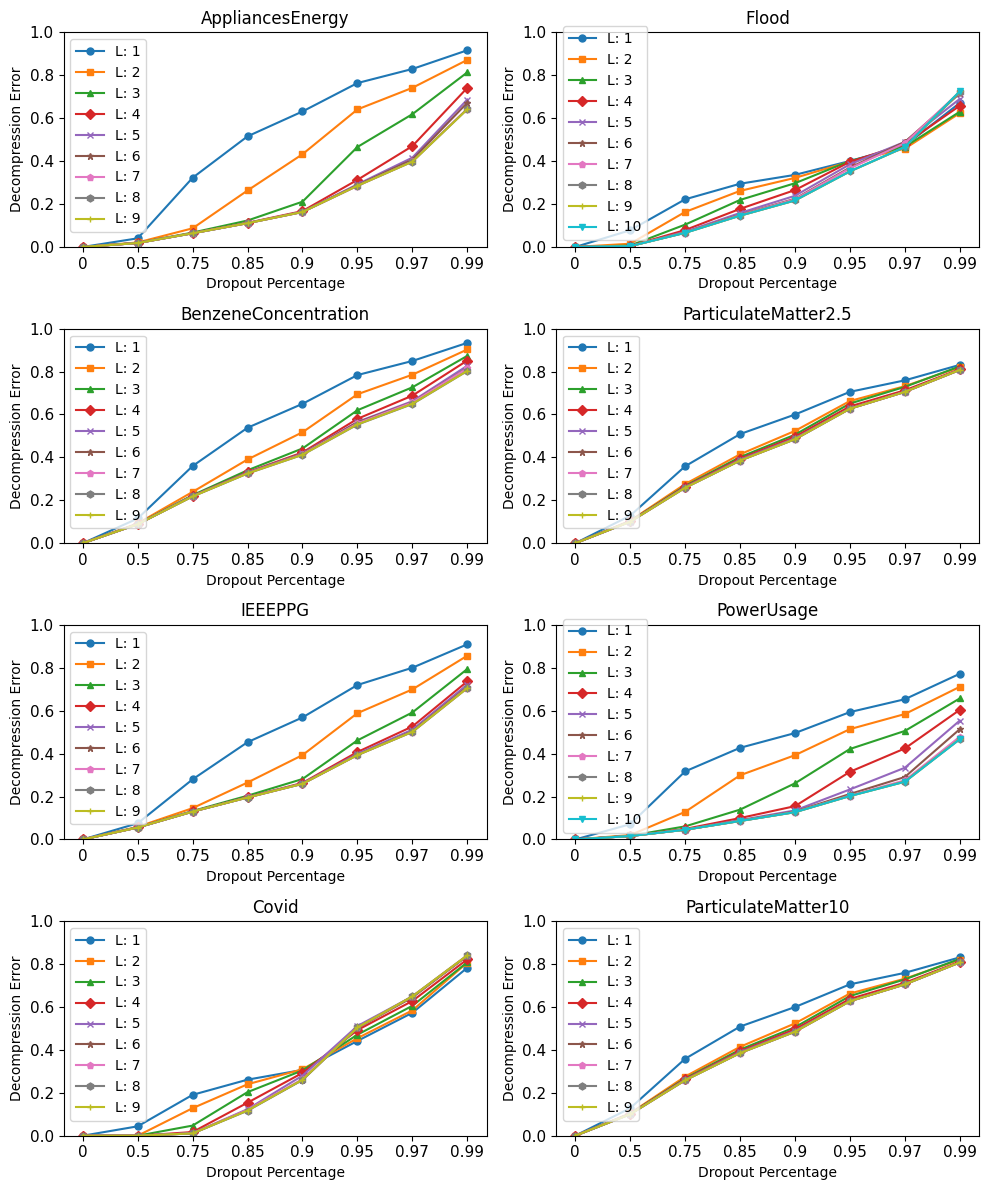

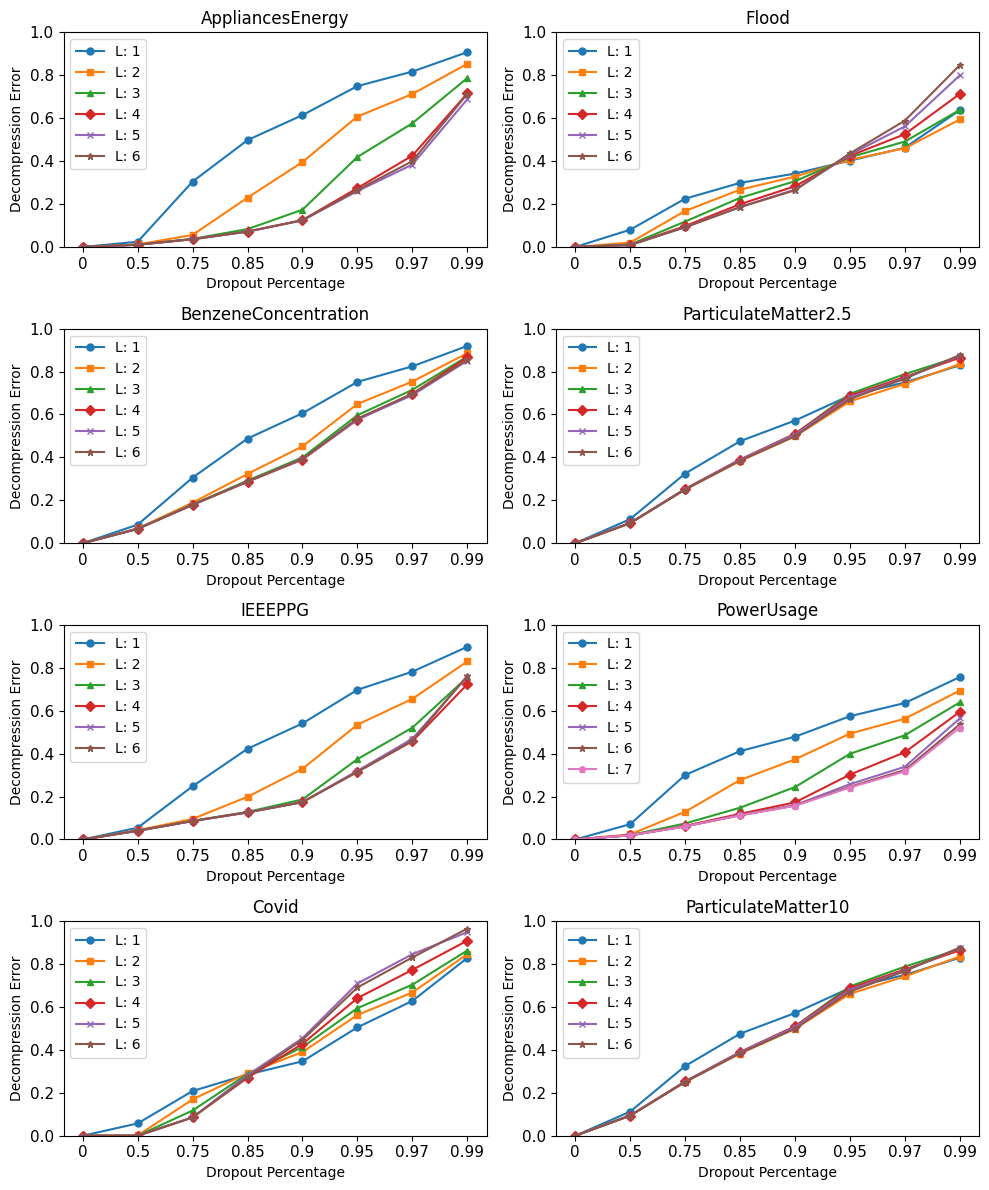

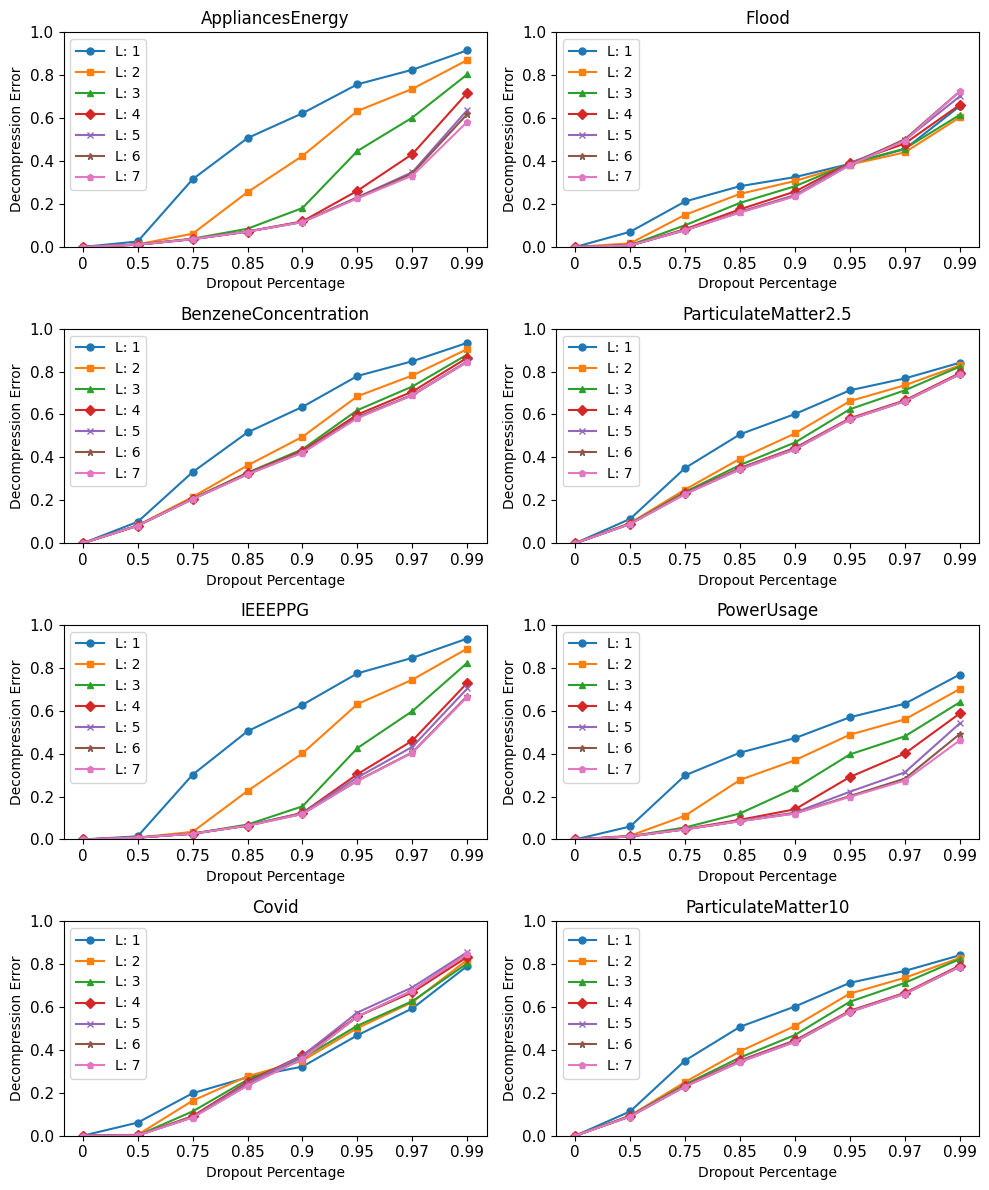

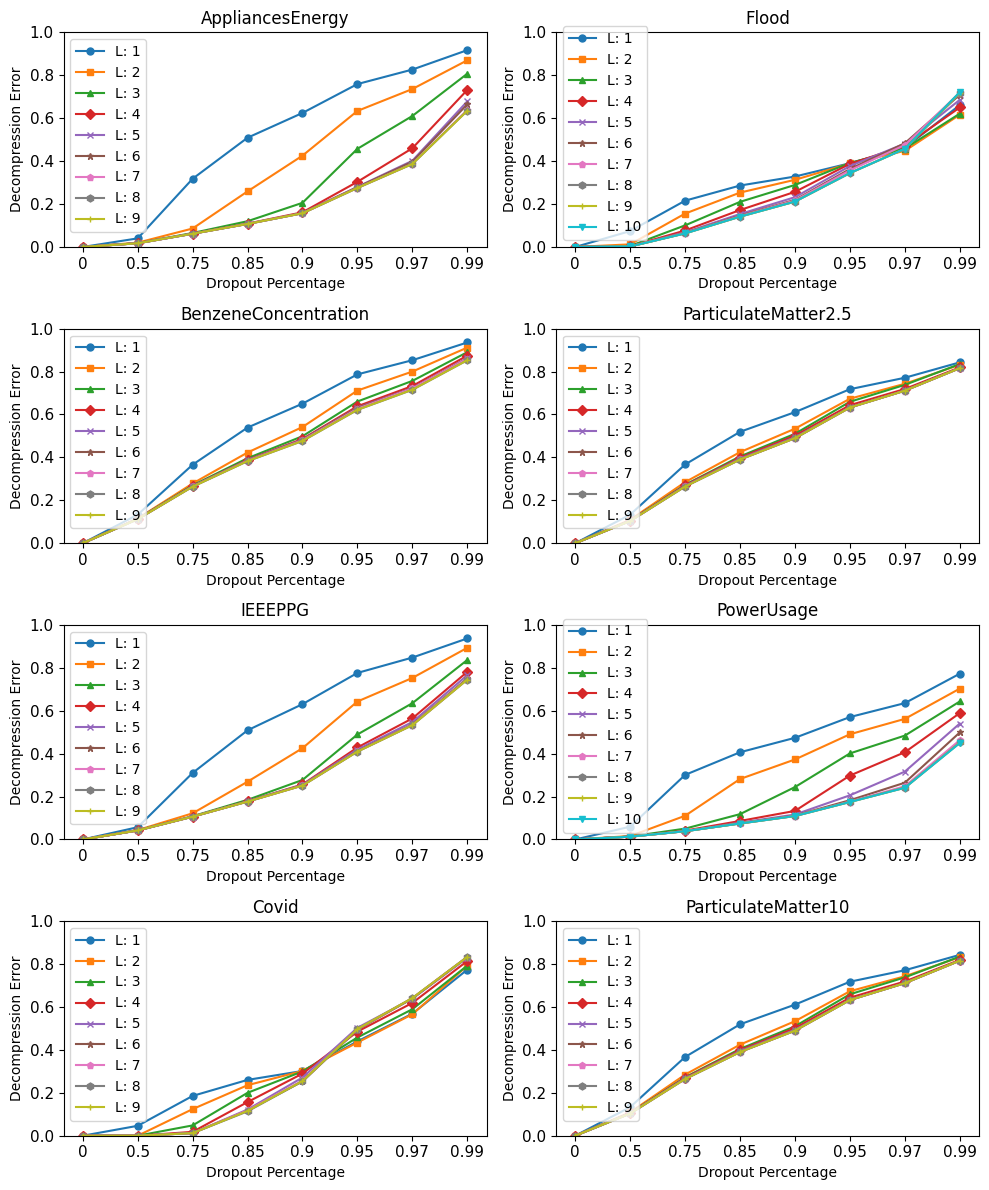

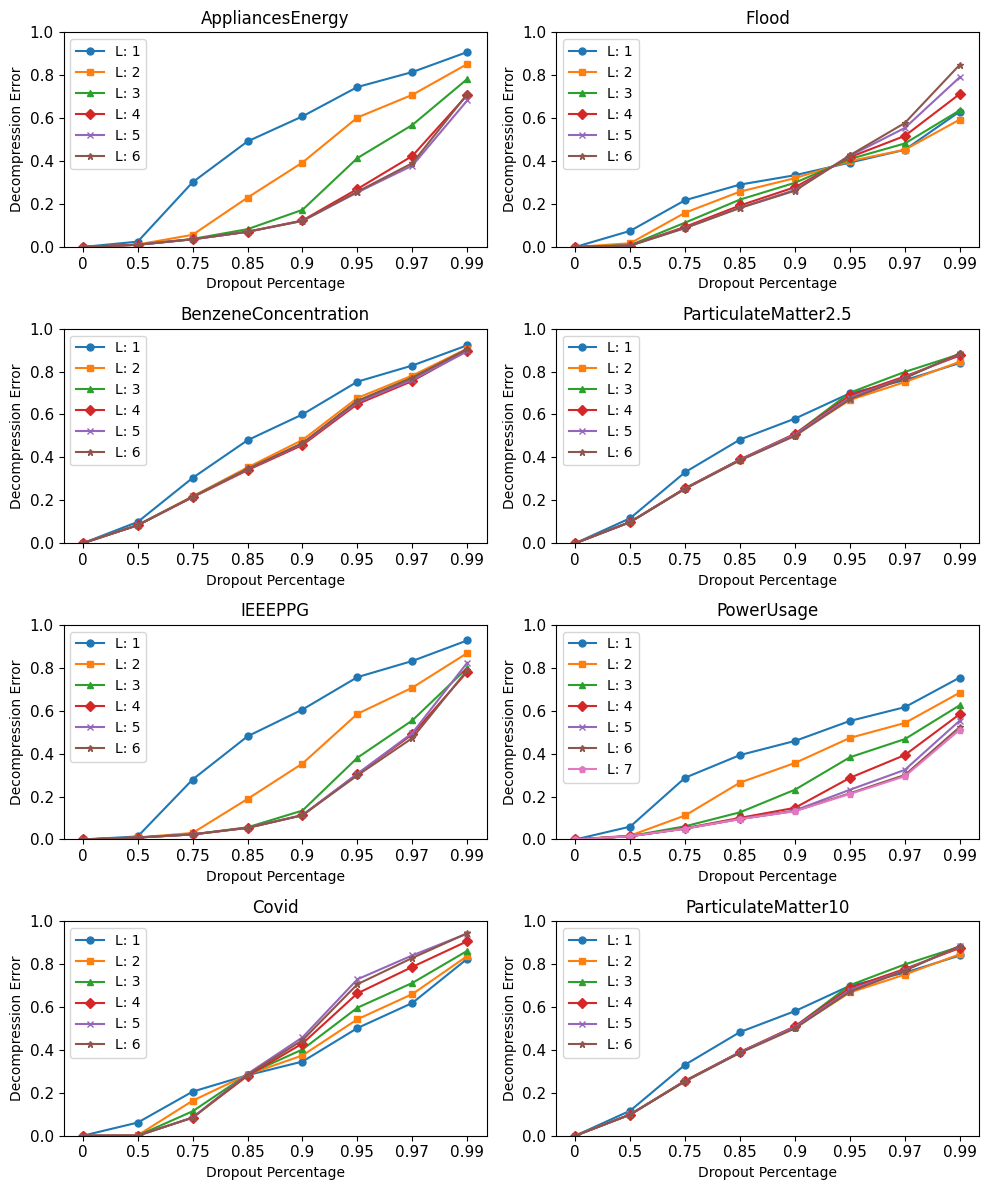

In [29]:
# Plot with x ticks as the dropout values -> to undo delete x ticks things and put into plot as first argument the dropout_values
# -> Other possibility to plot: legend outside the plot, thinner lines -> adapt for situation, ask chatgpt and also understand it! It is kinda easy!


wavelets = ['db4', 'haar', 'bior3.5']
splits = ['TEST', 'TRAIN']
for split in splits:


    markers = ['o', 's', '^', 'D', 'x', '*', 'p', 'h', '+', 'v']

    dropout_values = [0, 0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]


    custom_x_ticks = np.arange(len(dropout_values))

    for wavelet in wavelets:
        plt.figure(figsize=(10, 12))  # Adjust the width and height as needed

        for subplot_id, ds_name in enumerate(ds_names):

            plt.subplot(4,2, subplot_id + 1)

            max_level = pywt.dwt_max_level(dataset_params[ds_name]['block_size'], wavelet)

            for level in range(1, max_level + 1):
                rmses = np.load(f'/home/sim/Desktop/TS Extrinsic Regression/data/Wavelet-Levels/wv-lvl:{level}-{ds_name}_{wavelet}_{split}.npy')


                marker_style = markers[level-1]


                plt.plot( custom_x_ticks, rmses, markersize=5, marker=marker_style, label=f"L: {level}")
                #plt.plot(dropout_values, rmses, markersize=5, marker=marker_style, label=f"L: {level}")


            ds_name = change_ds_name(ds_name)

            x_limits = (0, 1.0)
            y_limits = (0, 1.0)

            #x_ticks = np.arange(0, 1.1, 0.2)  # X-axis ticks from 0 to 10 with a step of 2
            y_ticks = np.arange(0, 1.1, 0.2)

            #plt.gca().set_xlim(x_limits)
            plt.gca().set_ylim(y_limits)
            #plt.gca().set_xticks(x_ticks)
            plt.gca().set_yticks(y_ticks)

            plt.xticks(fontsize=11)
            plt.yticks(fontsize=11)


            plt.xlabel("Dropout Percentage")
            plt.ylabel("Decompression Error")
            plt.title(f"{ds_name}")
            plt.xticks(custom_x_ticks, dropout_values)
            #plt.legend(fontsize="small", loc='upper left', bbox_to_anchor=(1, 1), markerscale=0.8)
            plt.legend()


        plt.tight_layout()

        save_dir = f"../plots/Wavelets"
        os.makedirs(save_dir, exist_ok=True)

        # Save the figure for this compression type
        plt.savefig(f'{save_dir}/lvl-{wavelet}_{split}_plot_noX.pdf', format='pdf')

        plt.show()

        # Close the figure after saving to avoid overwriting
        plt.close()



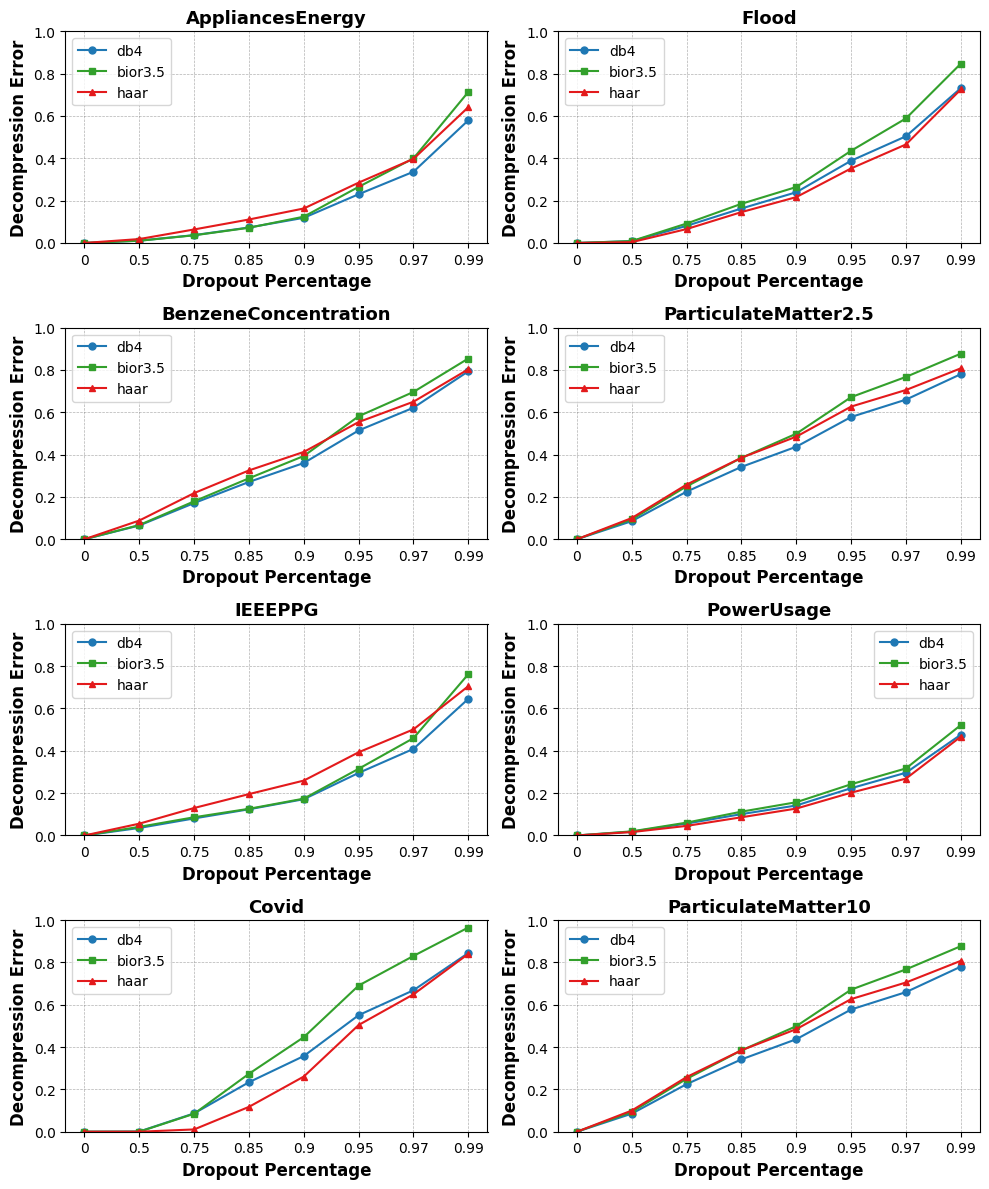

In [70]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pywt
from matplotlib import cm

# Define splits, wavelets, markers, dropout values, and a color palette
splits = ['TEST']
wavelet_types = ["db4", "bior3.5", "haar"]
markers = ['o', 's', '^']
dropout_values = [0, 0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]

# Define three highly distinguishable colors
colors = ['#FF8C00', '#8B0000', '#8A2BE2'] # Blue, Orange, Green
colors = [ '#DC143C', '#1E90FF', '#FF8C00']

colors = ['#1F78B4', '#33A02C', '#FB9A99']  # Blue, Green, Soft Pink
colors = ['#1F78B4', '#33A02C', '#E31A1C'] 


# Assuming ds_names and dataset_params are defined elsewhere
for split in splits:
    plt.figure(figsize=(10, 12))

    for subplot_id, ds_name in enumerate(ds_names):
        plt.subplot(4, 2, subplot_id + 1)

        # Get max level for wavelet decomposition
        block_size = dataset_params[ds_name]['block_size']
        max_level = pywt.dwt_max_level(block_size, wavelet_types[0])

        # Define x-ticks based on dropout values
        custom_x_ticks = np.arange(len(dropout_values))

        for m_id, wavelet in enumerate(wavelet_types):
            # Load RMSE data for the wavelet, dataset, and split
            rmses = np.load(f'/home/sim/Desktop/TS Extrinsic Regression/data/Winner-Wavelet/wv-win-{ds_name}_{wavelet}_{split}.npy')

            # Plot RMSE values for this wavelet with unique color and marker
            plt.plot(custom_x_ticks, rmses, color=colors[m_id], markersize=5, marker=markers[m_id], label=wavelet)

        # Update dataset name for title
        ds_name_display = change_ds_name(ds_name)

        # Set plot limits, ticks, and labels
        plt.ylim((0, 1.0))
        plt.yticks(np.arange(0, 1.1, 0.2))
        plt.xticks(custom_x_ticks, dropout_values, fontsize=10)
        plt.yticks(fontsize=10)

        # Grid and labels
        plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
        plt.xlabel("Dropout Percentage", fontsize=12, fontweight='bold')
        plt.ylabel("Decompression Error", fontsize=12, fontweight='bold')
        plt.title(f"{ds_name_display}", fontsize=13, fontweight='bold')

        # Add legend
        plt.legend()

    plt.tight_layout()

    # Save plot for each split type (TEST, TRAIN)
    save_dir = "../plots/Wavelets"
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(f'{save_dir}/winner_{split}_plot.pdf', format='pdf')

    plt.show()
    plt.close()



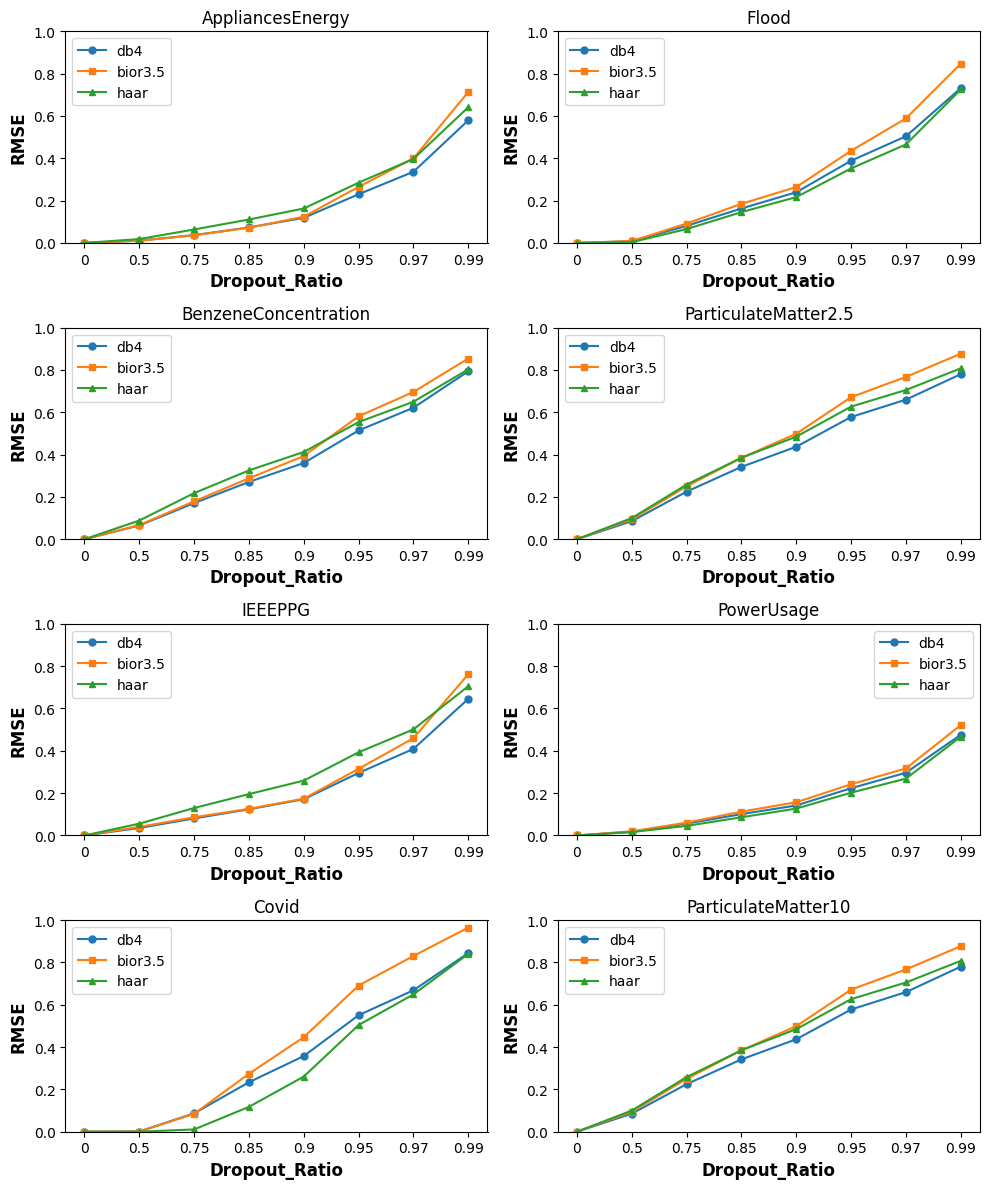

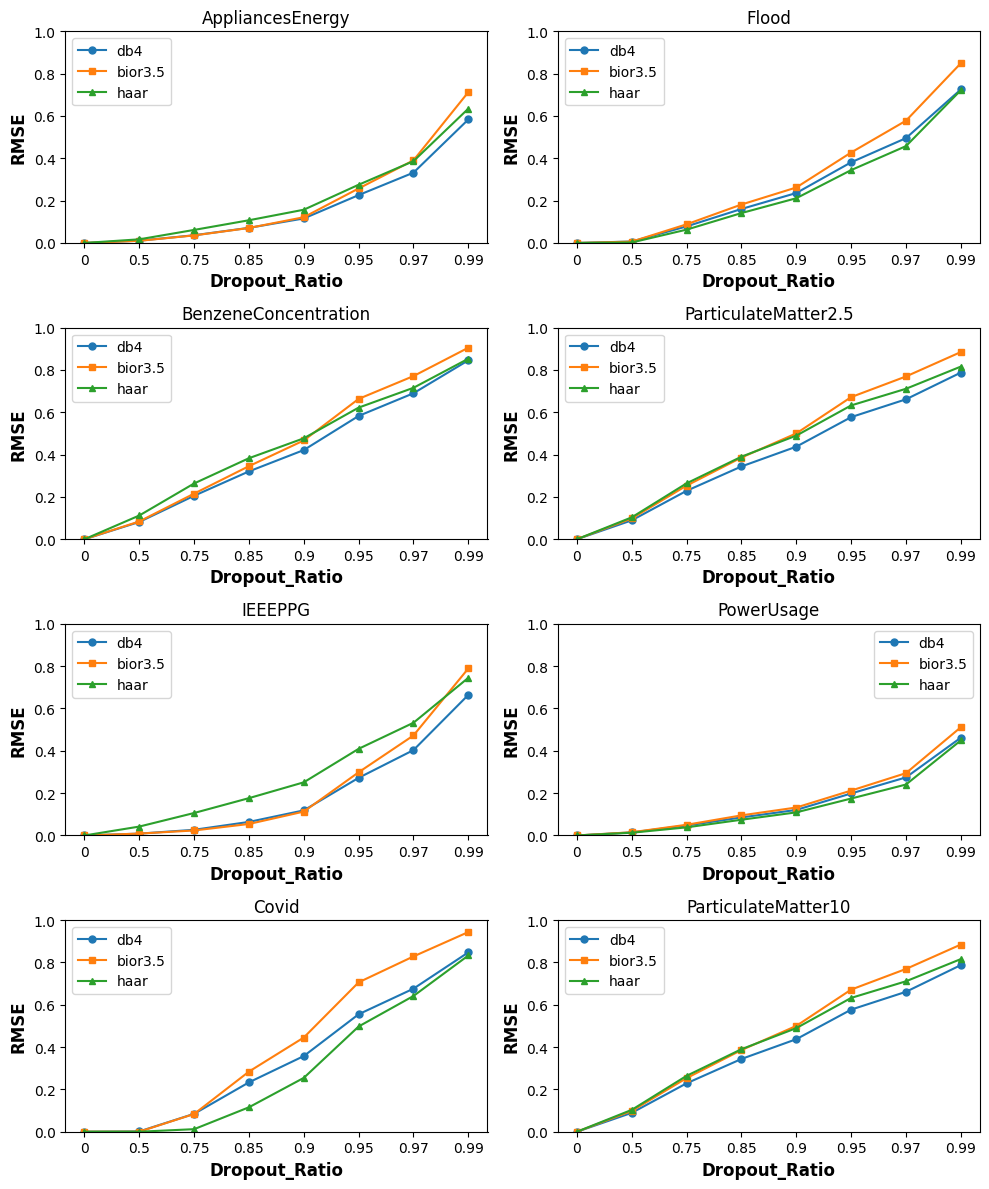

In [33]:
# Plot each Wavelet with best level into each Dataset to see overall best wavelet

splits = ['TEST', 'TRAIN']
for split in splits:


    markers = ['o', 's', '^', 'D', 'x', '*', 'p', 'h', '+', 'v']
    wavelet_type =["db4", "bior3.5", "haar"]
    dropout_values =  [0, 0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]


    plt.figure(figsize=(10,12))
    for subplot_id, ds_name in enumerate(ds_names):
        plt.subplot(4,2,subplot_id+1)


        max_level = pywt.dwt_max_level(dataset_params[ds_name]['block_size'], wavelet)
        custom_x_ticks = np.arange(len(dropout_values))

        m_id = 0
        for wavelet in wavelet_type:

            rmses = np.load(f'/home/sim/Desktop/TS Extrinsic Regression/data/Winner-Wavelet/wv-win-{ds_name}_{wavelet}_{split}.npy')


            
            marker_style = markers[m_id]
            m_id = m_id +1
            plt.plot(custom_x_ticks, rmses,markersize=5, marker=marker_style, label= wavelet)





        ds_name = change_ds_name(ds_name)

        plt.gca().set_ylim((0, 1.0))
        plt.gca().set_yticks(np.arange(0, 1.1, 0.2))

        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)

        plt.xlabel("Dropout Percentage", fontsize=12, fontweight='bold')
        plt.ylabel("Decompression Error", fontsize=12, fontweight='bold')
        plt.title(f"{ds_name}", fontsize=13, fontweight='bold')



        plt.xlabel("Dropout_Ratio")
        plt.ylabel("RMSE")
        plt.title(f"{ds_name}")
        plt.xticks(custom_x_ticks, dropout_values)
        plt.legend()

        #plt.grid(color='gray', linestyle='--', linewidth=0.5)


        
    plt.tight_layout()

    save_dir = f"../plots/Wavelets"
    os.makedirs(save_dir, exist_ok=True)

    # Save the figure for this compression type
    #plt.savefig(f'{save_dir}/winner_{split}_plot.pdf', format='pdf')

    plt.show()
    # Close the figure after saving to avoid overwriting
    plt.close()


    

Time taken for dataset AppliancesEnergy: 0.02 seconds
Time taken for dataset NewsTitleSentiment: 0.04 seconds
Time taken for dataset BenzeneConcentration: 0.04 seconds
Time taken for dataset BeijingPM25Quality: 0.02 seconds
Time taken for dataset IEEEPPG: 0.04 seconds
Time taken for dataset FloodModeling1: 0.02 seconds
Time taken for dataset HouseholdPowerConsumption1: 0.04 seconds
Time taken for dataset Covid3Month: 0.02 seconds


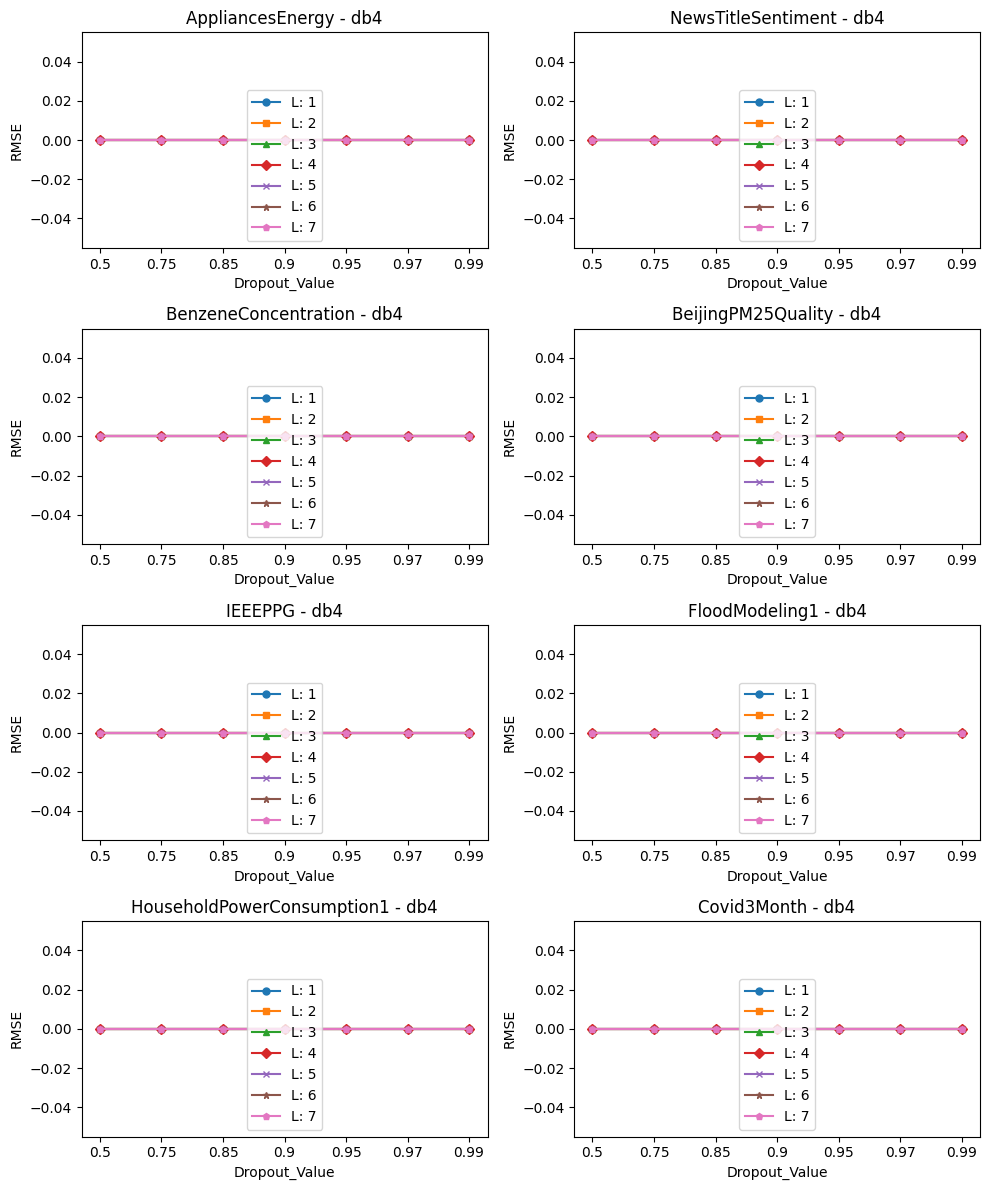

In [28]:
# Plot with x ticks as the dropout values -> to undo delete x ticks things and put into plot as first argument the dropout_values
# -> Other possibility to plot: legend outside the plot, thinner lines -> adapt for situation, ask chatgpt and also understand it! It is kinda easy!


wavelet = 'db4'
split = 'TEST'


markers = ['o', 's', '^', 'D', 'x', '*', 'p', 'h', '+', 'v']

dropout_values = [0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]


custom_x_ticks = np.arange(len(dropout_values))
plt.figure(figsize=(10, 12))  # Adjust the width and height as needed

for subplot_id, dataset_path in enumerate(all_datasets):
    start_time = time.time()

    
    dataset_id = os.path.basename(dataset_path).split('_')[0]
    dataset_array = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/' + dataset_id + '_TEST.npy')

   
    plt.subplot(4,2, subplot_id + 1)

    max_level = pywt.dwt_max_level(dataset_params[dataset_id]['block_size'], wavelet)

    for level in range(1, max_level + 1):
        rmses = np.zeros_like(dropout_values)

        #for i, step in enumerate(dropout_values):
            #decomp_dataset_array = compress_dataset(dataset_array.copy(), dataset_id, andDecompress=True, compression_type="dwt", compression_param=step, wavelet=wavelet, level=level)
            #rmses[i] = compute_avg_rmse_of_dataset(dataset_array, decomp_dataset_array)
            #rmses[i] = np.random.rand()
        

        marker_style = markers[level-1]
        plt.plot(custom_x_ticks, rmses, markersize=5, marker=marker_style, label=f"L: {level}")

    plt.xlabel("Dropout_Value")
    plt.ylabel("RMSE")
    plt.title(f"{dataset_id} - {wavelet}")
    plt.xticks(custom_x_ticks, dropout_values)
    #plt.legend(fontsize="small", loc='upper left', bbox_to_anchor=(1, 1), markerscale=0.8)
    plt.legend()
    
    end_time = time.time()
    print(f"Time taken for dataset {dataset_id}: {end_time - start_time:.2f} seconds")
plt.tight_layout()

plt.savefig('test.pdf', format='pdf')
plt.show()


Time taken for dataset AppliancesEnergy: 0.92 seconds
Time taken for dataset NewsTitleSentiment: 52.47 seconds
Time taken for dataset BenzeneConcentration: 186.56 seconds
Time taken for dataset BeijingPM25Quality: 12.44 seconds
Time taken for dataset IEEEPPG: 37.35 seconds
Time taken for dataset FloodModeling1: 0.37 seconds
Time taken for dataset HouseholdPowerConsumption1: 22.34 seconds
Time taken for dataset Covid3Month: 0.05 seconds


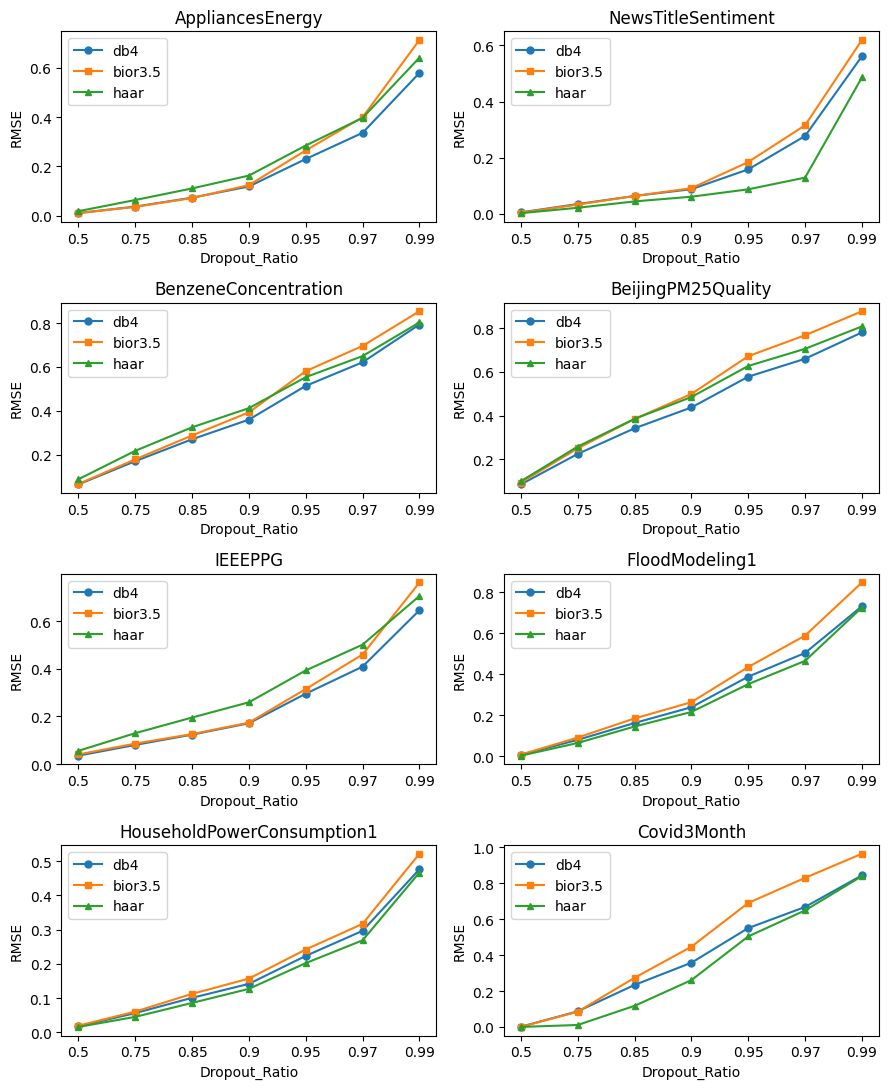

In [4]:
# Plot each Wavelet with best level into each Dataset to see overall best wavelet

markers = ['o', 's', '^', 'D', 'x', '*', 'p', 'h', '+', 'v']
wavelet_type =["db4", "bior3.5", "haar"]
dropout_values =  [0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]


plt.figure(figsize=(9,11))
for subplot_id, dataset_path in enumerate(all_datasets):
    plt.subplot(4,2,subplot_id+1)

    start_time = time.time()

    dataset_id = os.path.basename(dataset_path).split('_')[0]
    max_level = pywt.dwt_max_level(dataset_params[dataset_id]['block_size'], wavelet)
    dataset_array = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/' + dataset_id + '_TEST.npy')
    custom_x_ticks = np.arange(len(dropout_values))

    m_id = 0
    for wavelet in wavelet_type:
        rmses = np.empty_like(dropout_values)

        # Each level for wavelet
        level = max_level
        if dataset_id == "NewsTitleSentiment":
            level = 1

        for i,step in enumerate(dropout_values):
            decomp_dataset_array = compress_dataset(dataset_array.copy(), dataset_id, andDecompress= True, compression_type= "dwt", compression_param=step, wavelet= wavelet, level = level)
            rmses[i]= compute_avg_rmse_of_dataset(dataset_array, decomp_dataset_array)
            #rmses[i] = np.random.rand()


           
        marker_style = markers[m_id]
        m_id = m_id +1
        plt.plot(custom_x_ticks, rmses,markersize=5, marker=marker_style, label= wavelet)


    plt.xlabel("Dropout_Ratio")
    plt.ylabel("RMSE")
    plt.title(f"{dataset_id}")
    plt.xticks(custom_x_ticks, dropout_values)
    plt.legend()

    end_time = time.time()
    print(f"Time taken for dataset {dataset_id}: {end_time - start_time:.2f} seconds")
    #plt.grid(color='gray', linestyle='--', linewidth=0.5)
    
plt.tight_layout()
    
    


#plt.suptitle("Dropout_Ratio vs RMSE of 3 Wavelets")

#-> Go with db4